In [5]:
pip install mlxtend

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.4 MB 5.9 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 9.7 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   --------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.1/9.3 MB 34.4 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.3 MB 23.1 MB/s eta 0:00:01
   -------------- ---

In [2]:
import pandas as pd 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [ ]:
#exemple1

In [19]:
data = {'ID':[1,2,3,4,5,6],
       'Onion':[1,0,0,1,1,1],
       'Potato':[1,1,0,1,1,1],
       'Burger':[1,1,0,0,1,1],
       'Milk':[0,1,1,1,0,1],
       'Beer':[0,0,1,0,1,0]}

In [20]:
df = pd.DataFrame(data)

In [21]:
df

,ID,Onion,Potato,Burger,Milk,Beer
0,1,1,1,1,0,0
1,2,0,1,1,1,0
2,3,0,0,0,1,1
3,4,1,1,0,1,0
4,5,1,1,1,0,1
5,6,1,1,1,1,0


In [22]:
df = df[['ID', 'Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]]

In [23]:
df

,ID,Onion,Potato,Burger,Milk,Beer
0,1,1,1,1,0,0
1,2,0,1,1,1,0
2,3,0,0,0,1,1
3,4,1,1,0,1,0
4,5,1,1,1,0,1
5,6,1,1,1,1,0


In [32]:
frequent_itemsets = apriori(df[['Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]].astype('bool'), min_support=0.50, use_colnames=True)

In [33]:
frequent_itemsets

,support,itemsets
0,0.666667,(Onion)
1,0.833333,(Potato)
2,0.666667,(Burger)
3,0.666667,(Milk)
4,0.666667,"(Potato, Onion)"
5,0.500000,"(Burger, Onion)"
6,0.666667,"(Potato, Burger)"
7,0.500000,"(Potato, Milk)"
8,0.500000,"(Potato, Burger, Onion)"


In [34]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [35]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Potato),(Onion),0.833333,0.666667,0.666667,0.80,1.200,0.111111,1.666667,1.000000
1,(Onion),(Potato),0.666667,0.833333,0.666667,1.00,1.200,0.111111,inf,0.500000
2,(Burger),(Onion),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
3,(Onion),(Burger),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
4,(Potato),(Burger),0.833333,0.666667,0.666667,0.80,1.200,0.111111,1.666667,1.000000
5,(Burger),(Potato),0.666667,0.833333,0.666667,1.00,1.200,0.111111,inf,0.500000
6,"(Potato, Burger)",(Onion),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
7,"(Potato, Onion)",(Burger),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
8,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.00,1.200,0.083333,inf,0.333333
9,(Potato),"(Onion, Burger)",0.833333,0.500000,0.500000,0.60,1.200,0.083333,1.250000,1.000000


In [37]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf,0.500000
1,(Burger),(Potato),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf,0.500000
2,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.0,1.2,0.083333,inf,0.333333


In [38]:
rules[(rules['lift'] >1.125)  & (rules['confidence']> 0.8)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf,0.500000
1,(Burger),(Potato),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf,0.500000
2,"(Onion, Burger)",(Potato),0.500000,0.833333,0.500000,1.0,1.2,0.083333,inf,0.333333


In [ ]:
#exemple2

In [39]:
retail_shopping_basket = {'ID':[1,2,3,4,5,6],
                         'Basket':[['Beer', 'Diaper', 'Pretzels', 'Chips', 'Aspirin'],
                                   ['Diaper', 'Beer', 'Chips', 'Lotion', 'Juice', 'BabyFood', 'Milk'],
                                   ['Soda', 'Chips', 'Milk'],
                                   ['Soup', 'Beer', 'Diaper', 'Milk', 'IceCream'],
                                   ['Soda', 'Coffee', 'Milk', 'Bread'],
                                   ['Beer', 'Chips']
                                  ]
                         }

In [40]:
retail = pd.DataFrame(retail_shopping_basket)

In [41]:
retail = retail[['ID', 'Basket']]

In [45]:
pd.options.display.max_colwidth=100
retail

,ID,Basket
0,1,"[Beer, Diaper, Pretzels, Chips, Aspirin]"
1,2,"[Diaper, Beer, Chips, Lotion, Juice, BabyFood, Milk]"
2,3,"[Soda, Chips, Milk]"
3,4,"[Soup, Beer, Diaper, Milk, IceCream]"
4,5,"[Soda, Coffee, Milk, Bread]"
5,6,"[Beer, Chips]"


In [49]:
retail = retail.drop('Basket' ,axis=1).join(retail.Basket.str.join(',').str.get_dummies(','))

In [52]:
retail

,ID,Aspirin,BabyFood,Beer,Bread,Chips,Coffee,Diaper,IceCream,Juice,Lotion,Milk,Pretzels,Soda,Soup
0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0
1,2,0,1,1,0,1,0,1,0,1,1,1,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,4,0,0,1,0,0,0,1,1,0,0,1,0,0,1
4,5,0,0,0,1,0,1,0,0,0,0,1,0,1,0
5,6,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [57]:
frequent_itemsets_2 = apriori(retail.drop('ID',axis=1).astype('bool'), use_colnames=True)

In [56]:
frequent_itemsets_2

,support,itemsets
0,0.666667,(Beer)
1,0.666667,(Chips)
2,0.500000,(Diaper)
3,0.666667,(Milk)
4,0.500000,"(Beer, Chips)"
5,0.500000,"(Beer, Diaper)"


In [58]:
association_rules(frequent_itemsets_2, metric='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Beer),(Chips),0.666667,0.666667,0.5,0.75,1.125,0.055556,1.333333,0.333333
1,(Chips),(Beer),0.666667,0.666667,0.5,0.75,1.125,0.055556,1.333333,0.333333
2,(Beer),(Diaper),0.666667,0.500000,0.5,0.75,1.500,0.166667,2.000000,1.000000
3,(Diaper),(Beer),0.500000,0.666667,0.5,1.00,1.500,0.166667,inf,0.666667


In [59]:
association_rules(frequent_itemsets_2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Diaper),(Beer),0.5,0.666667,0.5,1.0,1.5,0.166667,inf,0.666667


In [ ]:
#exemple3

In [17]:
movies = pd.read_csv('movies.csv')

In [18]:
movies.head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [19]:
movies_ohe = movies.drop('genres',axis=1).join(movies.genres.str.get_dummies())

In [20]:
pd.options.display.max_columns=100
movies_ohe.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
stat1 = movies_ohe.drop(['title', 'movieId'],axis=1).apply(pd.value_counts)
stat1 = stat1.transpose().drop(0,axis=1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'})
stat2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})
stat2 = stat2[stat2['genre_count']==1].drop('movieId',axis=1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)
stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)
stat.genre_count=stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)
stat

C:\Users\Utilisateur2\AppData\Local\Temp\ipykernel_17164\3670860803.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  stat1 = movies_ohe.drop(['title', 'movieId'],axis=1).apply(pd.value_counts)


,No. of movies,title,No. of movies with only 1 genre
Drama,25606,Nixon (1995)Othello (1995)Dangerous Minds (199...,9056
Comedy,16870,Father of the Bride Part II (1995)Four Rooms (...,5674
Thriller,8654,"Jade (1995)Safe (1995)Tie That Binds, The (199...",919
Romance,7719,"Modern Affair, A (1995)Jack and Sarah (1995)Li...",278
Action,7348,Sudden Death (1995)Fair Game (1995)Under Siege...,562
Horror,5989,Lord of Illusions (1995)Castle Freak (1995)Fea...,1661
Documentary,5605,Nico Icon (1995)Heidi Fleiss: Hollywood Madam ...,4731
Crime,5319,Coup de torchon (Clean Slate) (1981)Switchblad...,218
(no genres listed),5062,Away with Words (San tiao ren) (1999)Glitterbu...,5062
Adventure,4145,"Mark of Zorro, The (1940)Macao (1952)Prince Va...",243


Text(0.5, 1.0, 'distribution of number of genres')

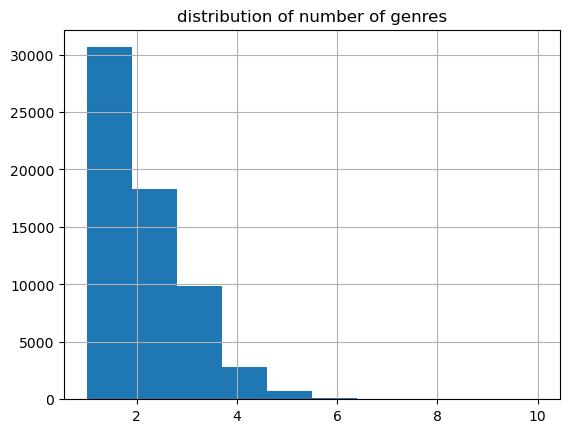

In [9]:
%matplotlib inline
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')

In [10]:
movies_ohe.set_index(['movieId','title'],inplace=True)
frequent_itemsets_movies = apriori(movies_ohe,use_colnames=True, min_support=0.025)
frequent_itemsets_movies

C:\Users\Utilisateur2\anaconda3\envs\devSalah_ws1_apriori\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.081092,((no genres listed))
1,0.117713,(Action)
2,0.066402,(Adventure)
3,0.046922,(Animation)
4,0.047018,(Children)
5,0.270253,(Comedy)
6,0.085209,(Crime)
7,0.089791,(Documentary)
8,0.410201,(Drama)
9,0.043750,(Fantasy)


In [11]:
rules_movies =  association_rules(frequent_itemsets_movies, metric='lift', min_threshold=1.25)

In [12]:
rules_movies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Adventure),(Action),0.066402,0.117713,0.026465,0.398552,3.385798,0.018648,1.466939,0.754766
1,(Action),(Adventure),0.117713,0.066402,0.026465,0.224823,3.385798,0.018648,1.204368,0.798661
2,(Thriller),(Action),0.138635,0.117713,0.035388,0.255258,2.168474,0.019068,1.184688,0.625572
3,(Action),(Thriller),0.117713,0.138635,0.035388,0.300626,2.168474,0.019068,1.231623,0.610738
4,(Romance),(Comedy),0.123656,0.270253,0.055268,0.446949,1.653818,0.021850,1.319493,0.451123
5,(Comedy),(Romance),0.270253,0.123656,0.055268,0.204505,1.653818,0.021850,1.101633,0.541747
6,(Crime),(Drama),0.085209,0.410201,0.047995,0.563264,1.373140,0.013042,1.350469,0.297054
7,(Drama),(Crime),0.410201,0.085209,0.047995,0.117004,1.373140,0.013042,1.036008,0.460737
8,(Thriller),(Crime),0.138635,0.085209,0.033081,0.238618,2.800385,0.021268,1.201488,0.746381
9,(Crime),(Thriller),0.085209,0.138635,0.033081,0.388231,2.800385,0.021268,1.407991,0.702790


In [22]:
rules_movies[(rules_movies.conviction>1.25)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Adventure),(Action),0.066402,0.117713,0.026465,0.398552,3.385798,0.018648,1.466939,0.754766
4,(Romance),(Comedy),0.123656,0.270253,0.055268,0.446949,1.653818,0.021850,1.319493,0.451123
6,(Crime),(Drama),0.085209,0.410201,0.047995,0.563264,1.373140,0.013042,1.350469,0.297054
9,(Crime),(Thriller),0.085209,0.138635,0.033081,0.388231,2.800385,0.021268,1.407991,0.702790
11,(Romance),(Drama),0.123656,0.410201,0.074556,0.602928,1.469834,0.023832,1.485369,0.364755
13,(Horror),(Thriller),0.095942,0.138635,0.034939,0.364168,2.626813,0.021638,1.354705,0.685034


In [25]:
rules_movies[(rules_movies.conviction>1.25)].sort_values(by=['lift','conviction'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Adventure),(Action),0.066402,0.117713,0.026465,0.398552,3.385798,0.018648,1.466939,0.754766
9,(Crime),(Thriller),0.085209,0.138635,0.033081,0.388231,2.800385,0.021268,1.407991,0.702790
13,(Horror),(Thriller),0.095942,0.138635,0.034939,0.364168,2.626813,0.021638,1.354705,0.685034
4,(Romance),(Comedy),0.123656,0.270253,0.055268,0.446949,1.653818,0.021850,1.319493,0.451123
11,(Romance),(Drama),0.123656,0.410201,0.074556,0.602928,1.469834,0.023832,1.485369,0.364755
6,(Crime),(Drama),0.085209,0.410201,0.047995,0.563264,1.373140,0.013042,1.350469,0.297054


In [28]:
pd.options.display.max_rows=50
movies[(movies.genres.str.contains('Adventure')) & (movies.genres.str.contains('Children')) & (~movies.genres.str.contains('Animation'))]

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
55,56,Kids of the Round Table (1995),Adventure|Children|Comedy|Fantasy
59,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
105,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical
...,...,...,...
62013,207556,Krakonoš a lyžníci (1981),Adventure|Children|Comedy
62028,207614,Os Saltimbancos Trapalhões (1981),Adventure|Children|Comedy
62029,207616,Os Trapalhões no Reino da Fantasia (1985),Adventure|Children|Comedy|Fantasy
62032,207622,A Princesa Xuxa e os Trapalhões (1989),Adventure|Children|Comedy|Sci-Fi


In [29]:
movies[(movies.title.str.contains('Tomorrowland'))]

,movieId,title,genres
28590,132046,Tomorrowland (2015),Action|Adventure|Children|Mystery|Sci-Fi
